# Life cycle of Machine learning Project

## Understanding the Problem Statement
*Data Collection
*Data Checks to perform
*Exploratory data analysis
*Data Pre-Processing
*Model Training
*Choose best model

### 1) Problem statement
This project understands how the insurance price is predicted

### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance

* The data consists of 11 column and 986 rows.

## 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('Medicalpremium.csv')

In [3]:
cat = [ 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries' ]

In [4]:
for i in cat:
    df[i] = df[i].apply(str)

In [5]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


In [50]:
df.shape

(986, 11)

In [51]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


In [8]:
df.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

In [9]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

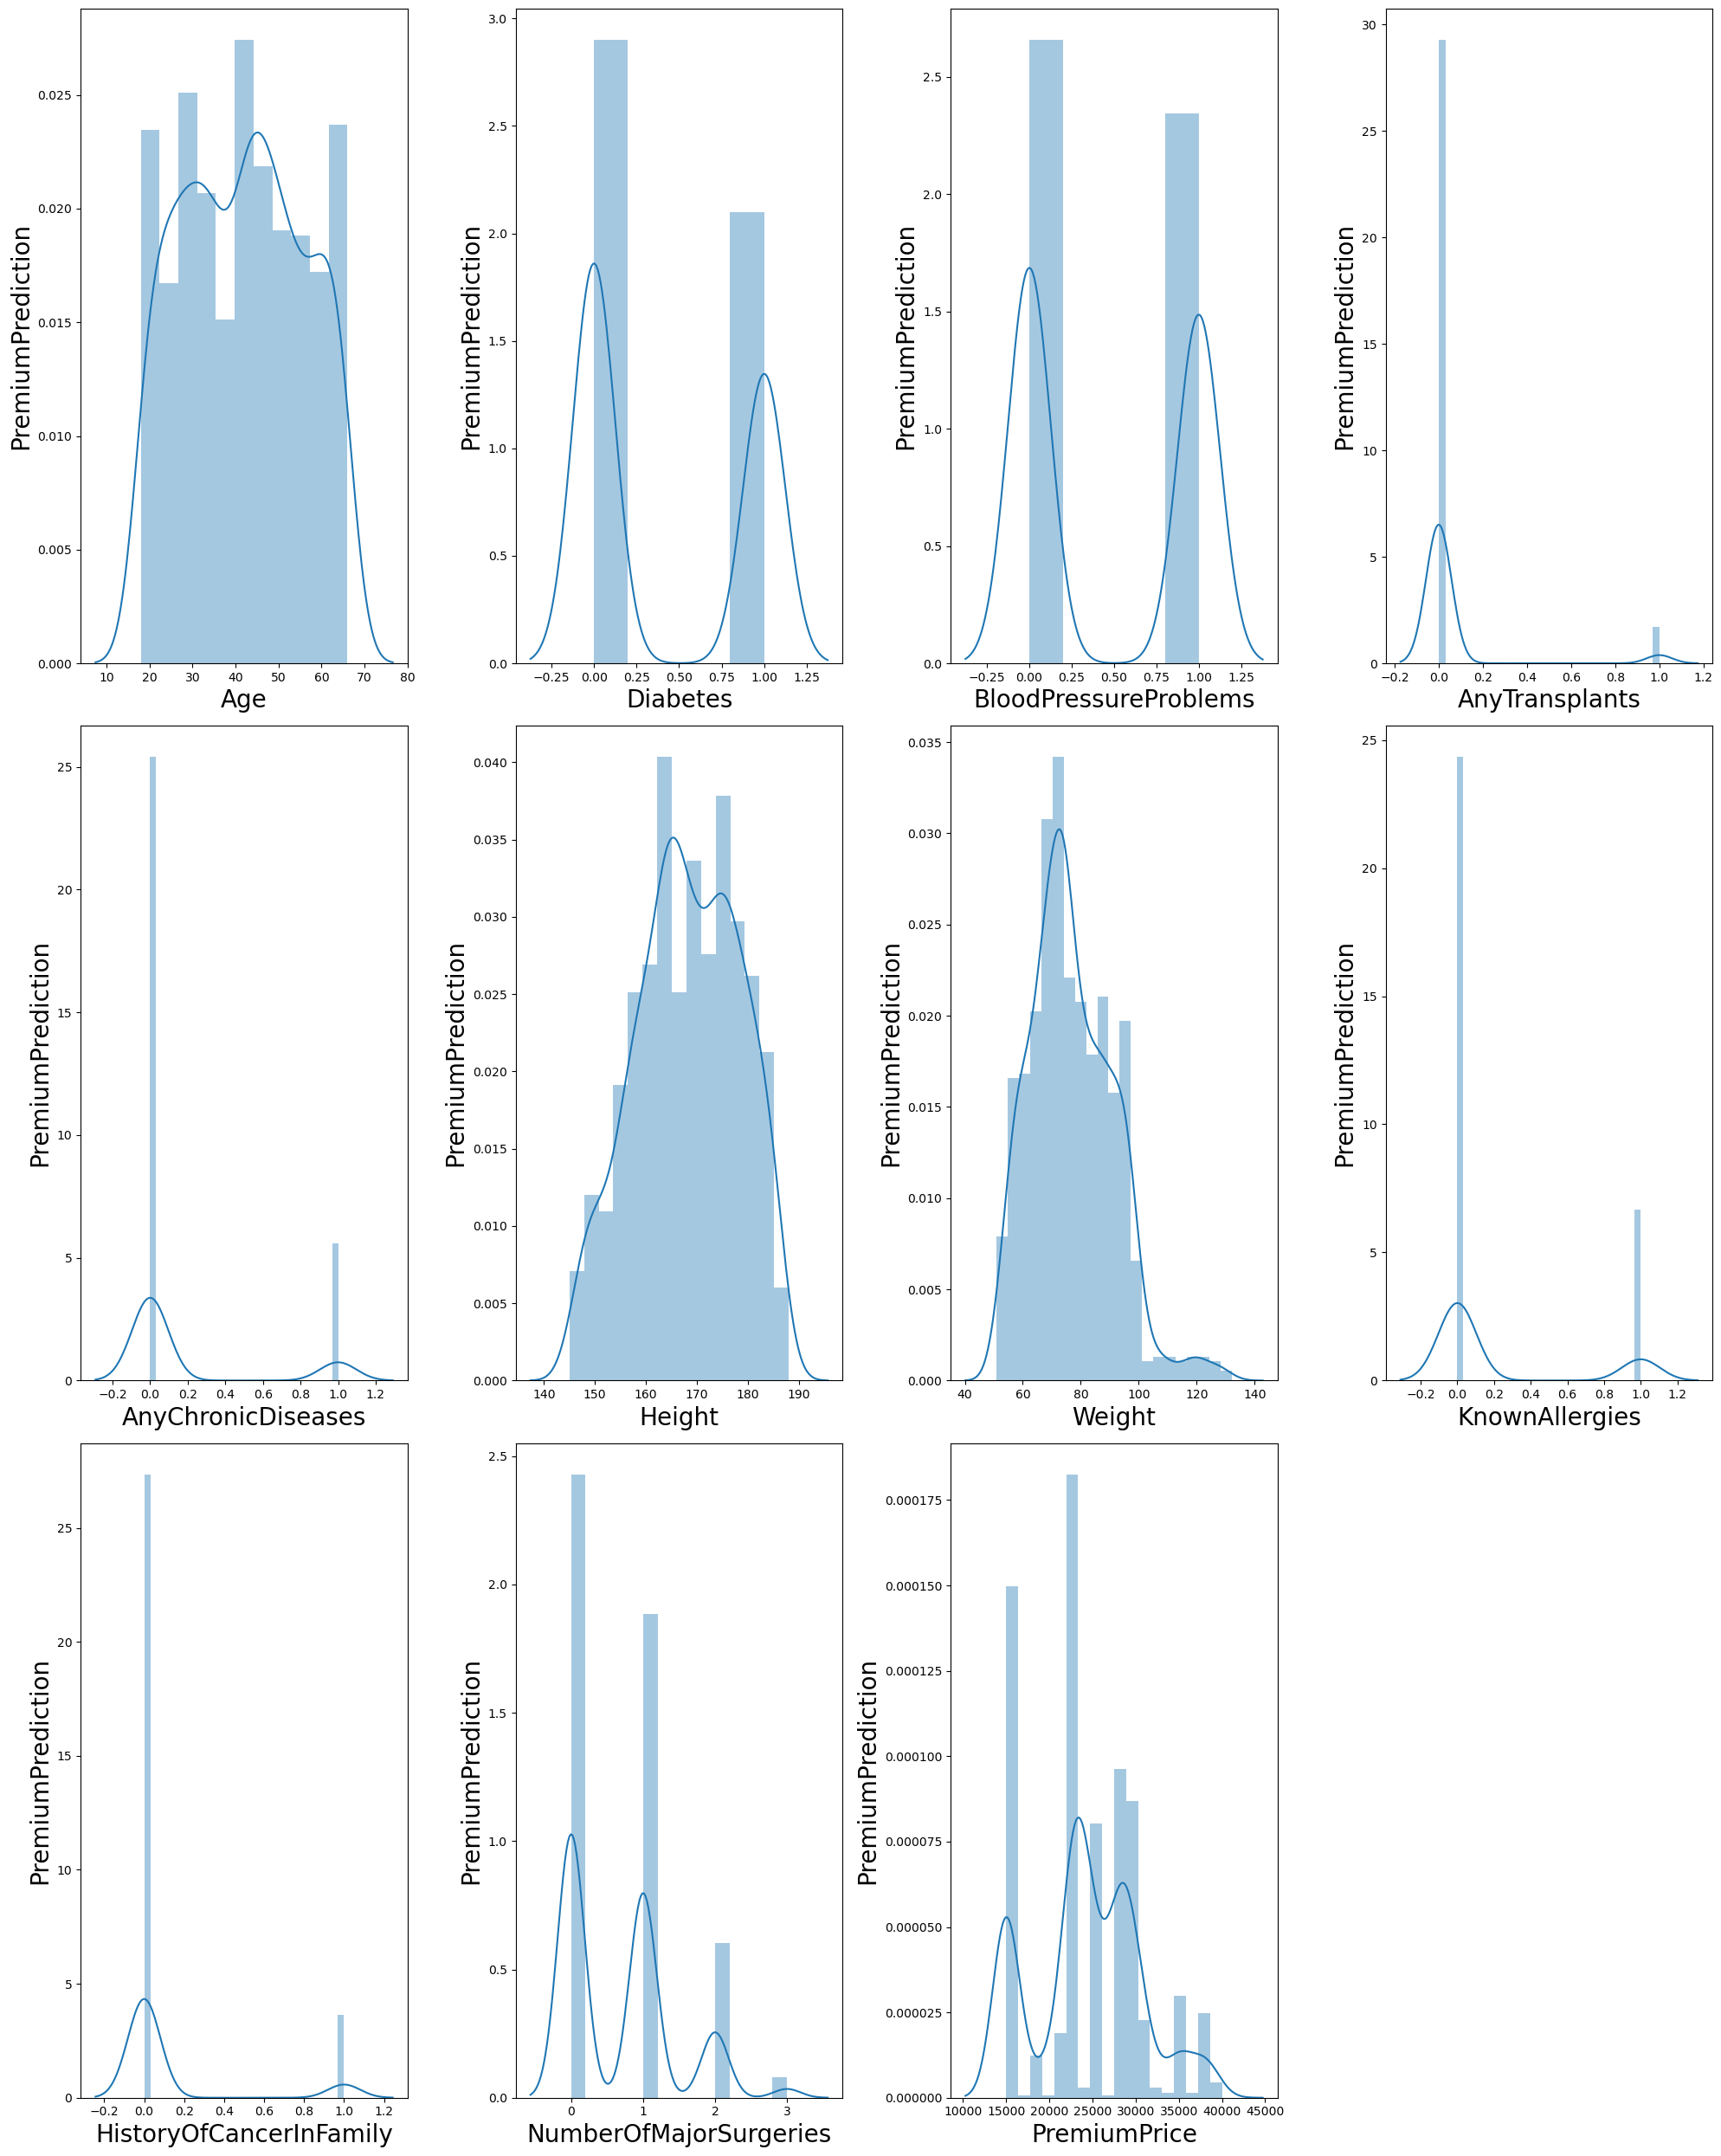

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PremiumPrediction',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

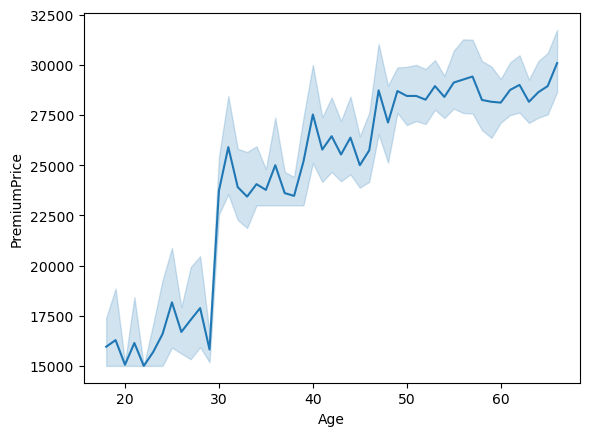

In [14]:
sns.lineplot(x = 'Age',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

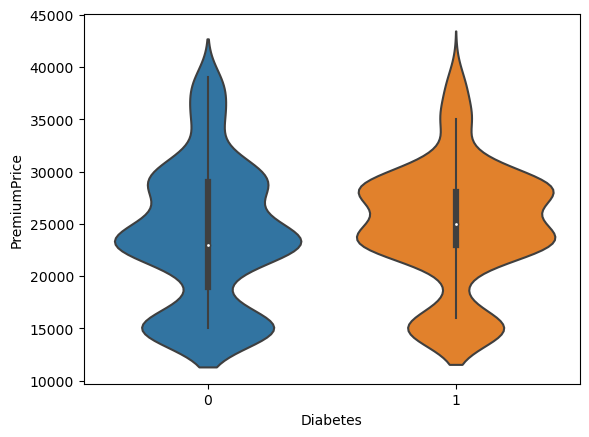

In [15]:
sns.violinplot(x = 'Diabetes',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

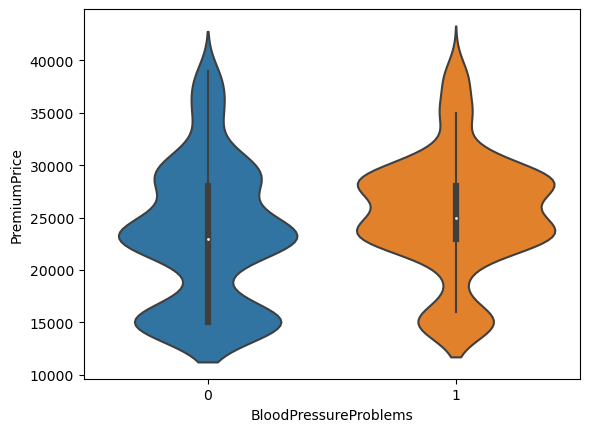

In [16]:
sns.violinplot(x = 'BloodPressureProblems',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

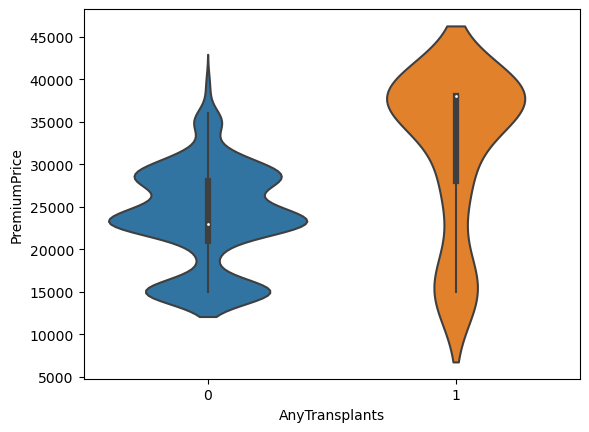

In [17]:
sns.violinplot(x = 'AnyTransplants',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

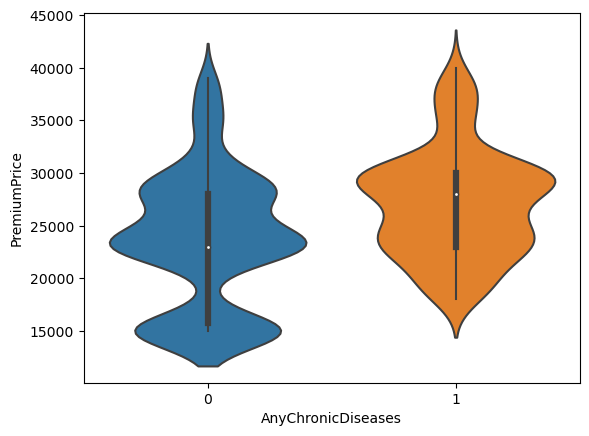

In [18]:
sns.violinplot(x = 'AnyChronicDiseases',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

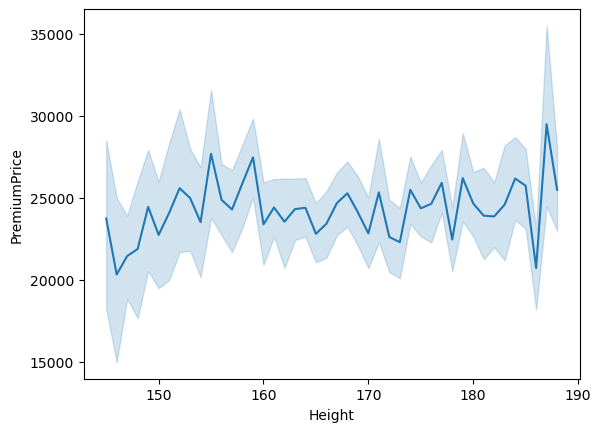

In [19]:
sns.lineplot(x = 'Height',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

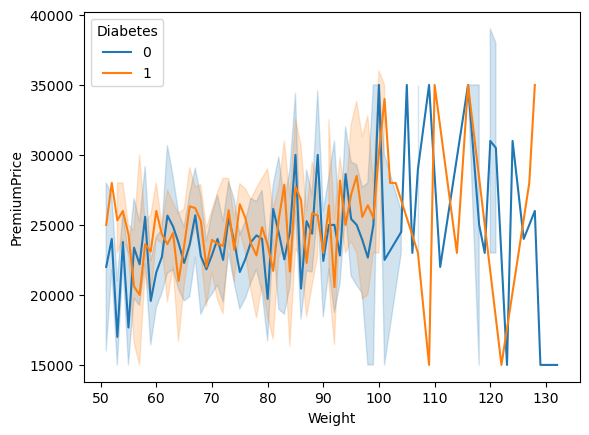

In [20]:
sns.lineplot(x = 'Weight',y='PremiumPrice',data=df,hue='Diabetes')

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

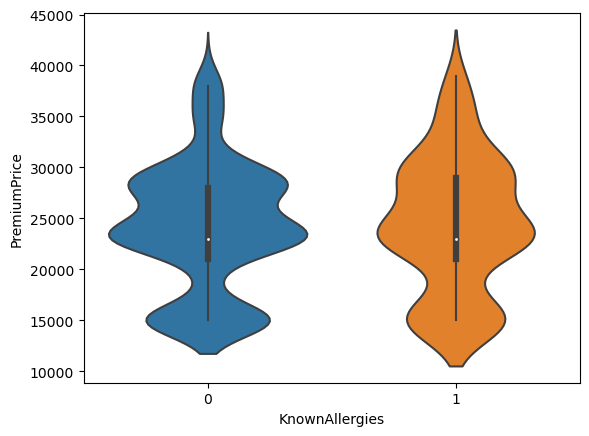

In [21]:
sns.violinplot(x = 'KnownAllergies',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

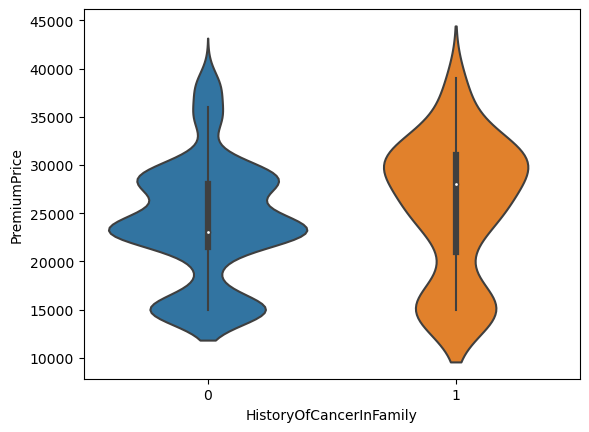

In [22]:
sns.violinplot(x = 'HistoryOfCancerInFamily',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

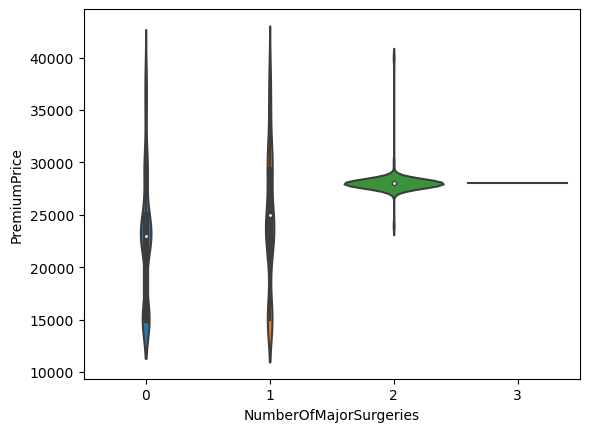

In [23]:
sns.violinplot(x = 'NumberOfMajorSurgeries',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

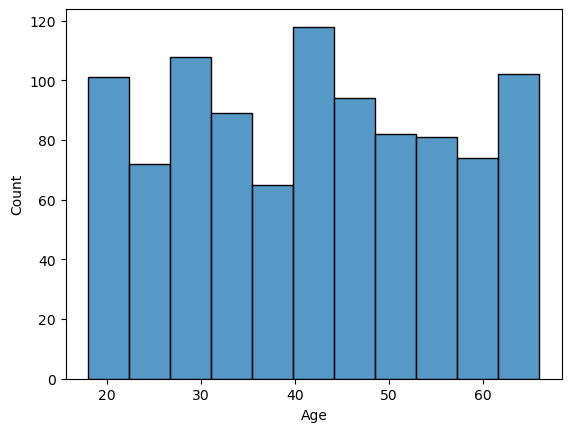

In [24]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

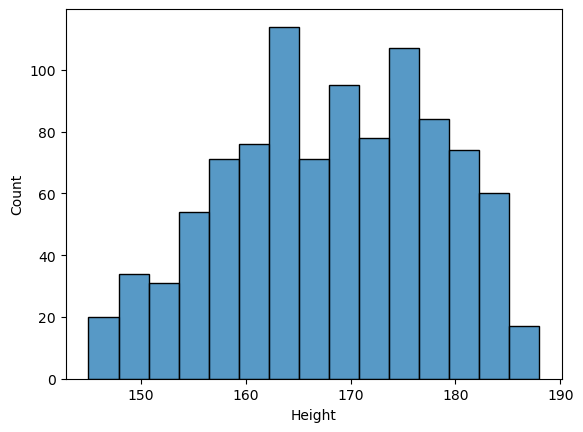

In [25]:
sns.histplot(df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

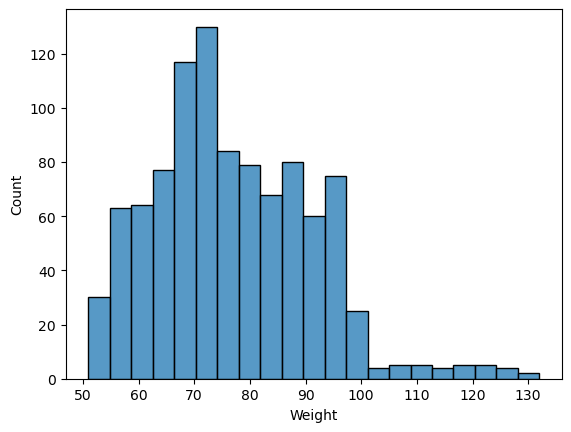

In [26]:
sns.histplot(df['Weight'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

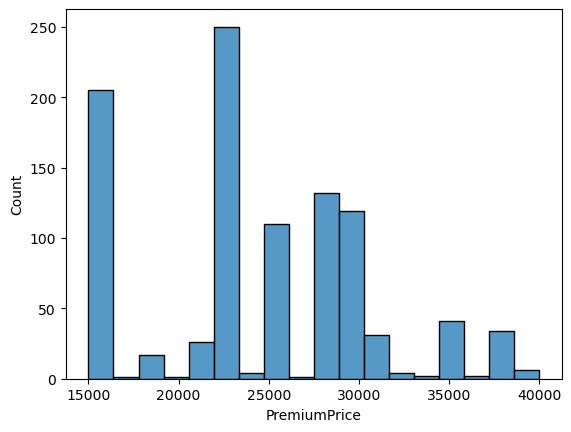

In [27]:
sns.histplot(df['PremiumPrice'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

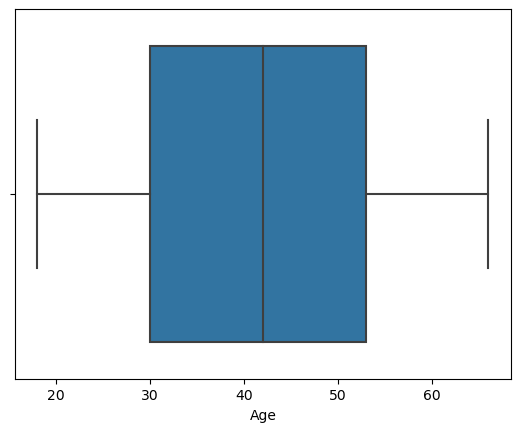

In [28]:
sns.boxplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

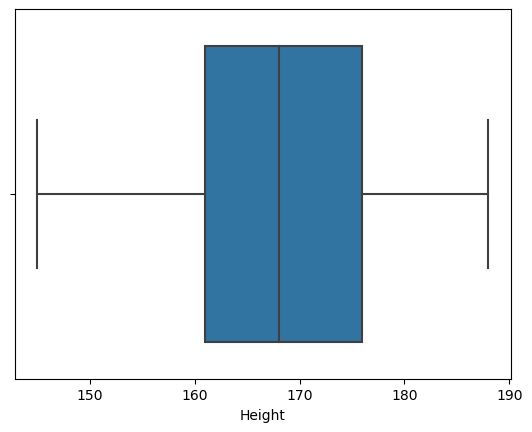

In [29]:
sns.boxplot(df['Height'])

<AxesSubplot:xlabel='Weight'>

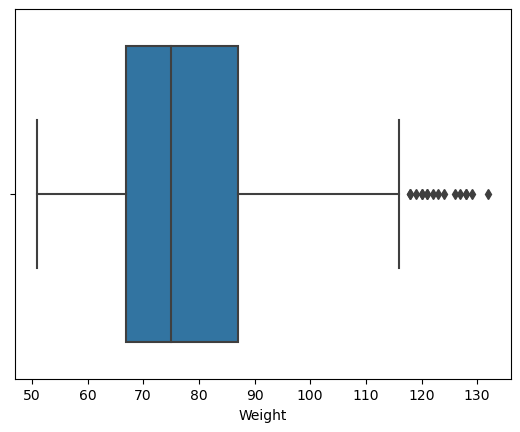

In [35]:
sns.boxplot(df['Weight'])